In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('./assets/datasets/h02.csv')

In [12]:
print data.shape
data.head()


(203, 1)


,Values
Month,
1991-08-01,0.400906
1991-09-01,0.432159
1991-10-01,0.492543
1991-11-01,0.502369
1991-12-01,0.602652


In [8]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('./assets/datasets/h02.csv', parse_dates=True, index_col='1991-07', date_parser=dateparse)
data.columns = ['Values']
data.index.name = 'Month'
data.head()

,Values
Month,
1991-08-01,0.400906
1991-09-01,0.432159
1991-10-01,0.492543
1991-11-01,0.502369
1991-12-01,0.602652


In [9]:
ts = data['Values'] 
ts.head(10)

Month
1991-08-01    0.400906
1991-09-01    0.432159
1991-10-01    0.492543
1991-11-01    0.502369
1991-12-01    0.602652
1992-01-01    0.660119
1992-02-01    0.336220
1992-03-01    0.351348
1992-04-01    0.379808
1992-05-01    0.361801
Name: Values, dtype: float64

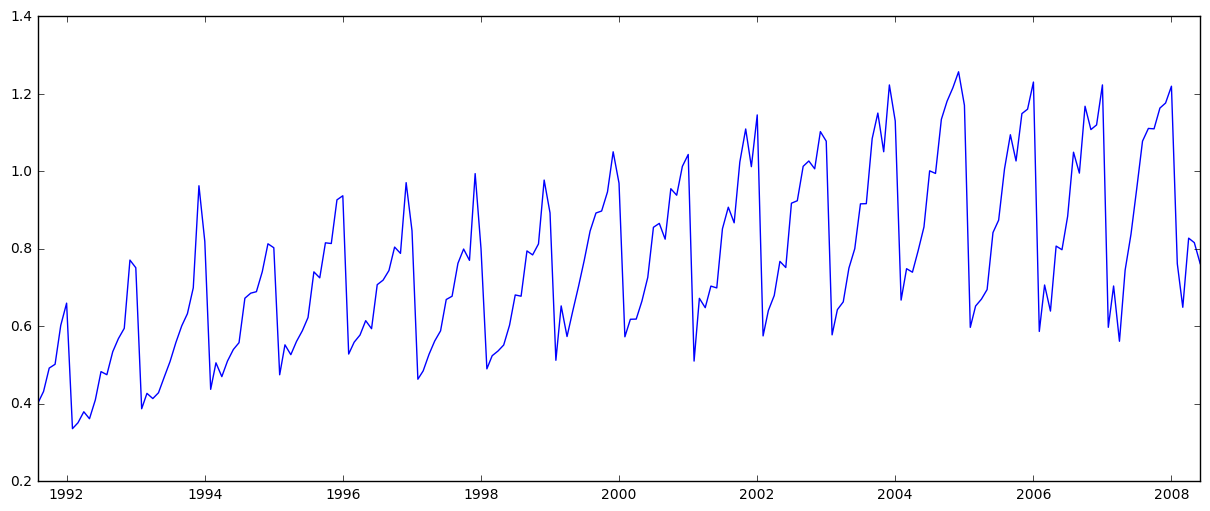

In [11]:
plt.plot(data)

In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/Users/Shreyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/Shreyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


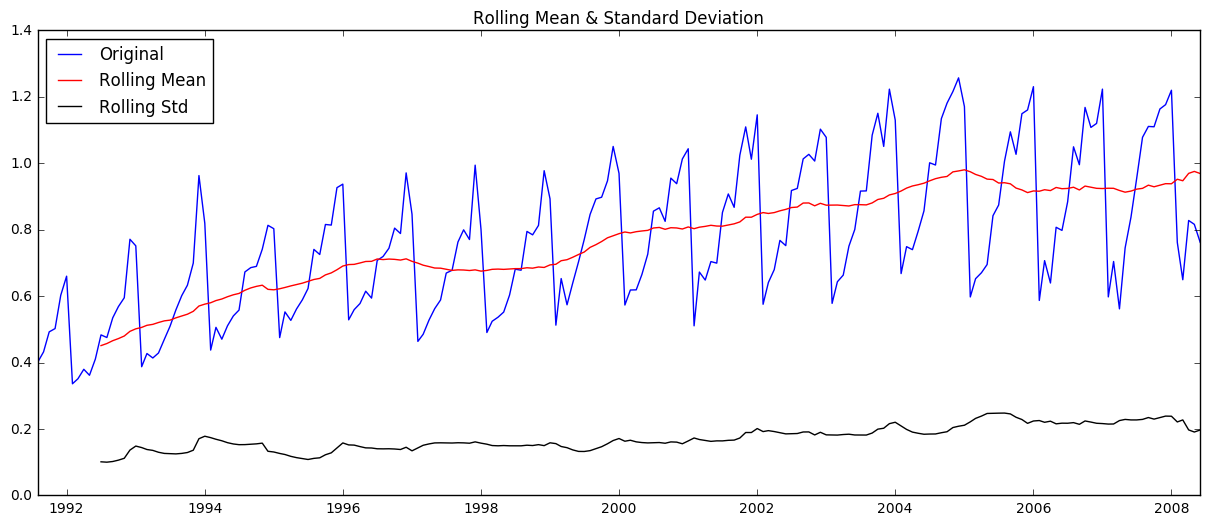

Results of Dickey-Fuller Test:
Test Statistic                  -1.653022
p-value                          0.455465
#Lags Used                      15.000000
Number of Observations Used    187.000000
Critical Value (5%)             -2.877123
Critical Value (1%)             -3.465812
Critical Value (10%)            -2.575077
dtype: float64


In [14]:
test_stationarity(ts)

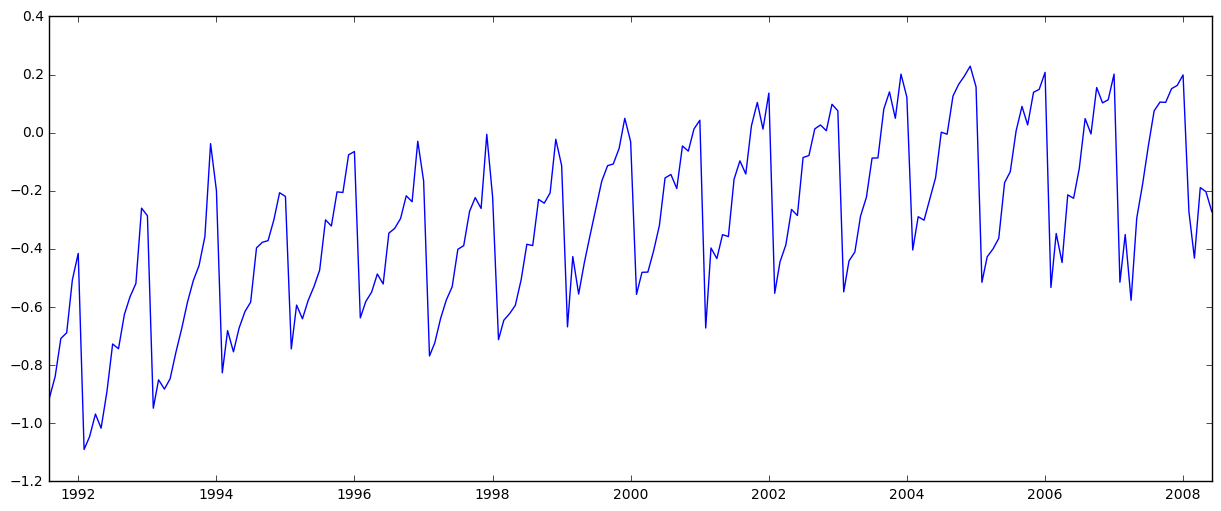

In [15]:
ts_log = np.log(ts)
plt.plot(ts_log)

/Users/Shreyas/anaconda/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


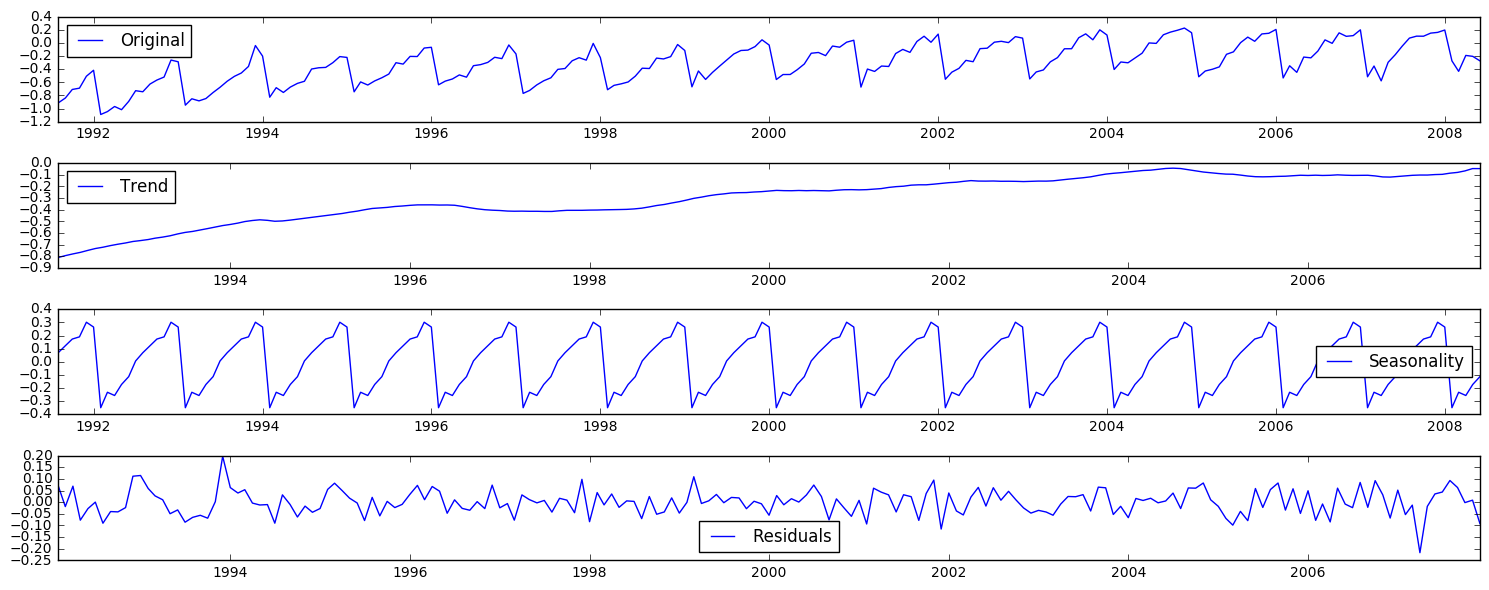

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/Users/Shreyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/Shreyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


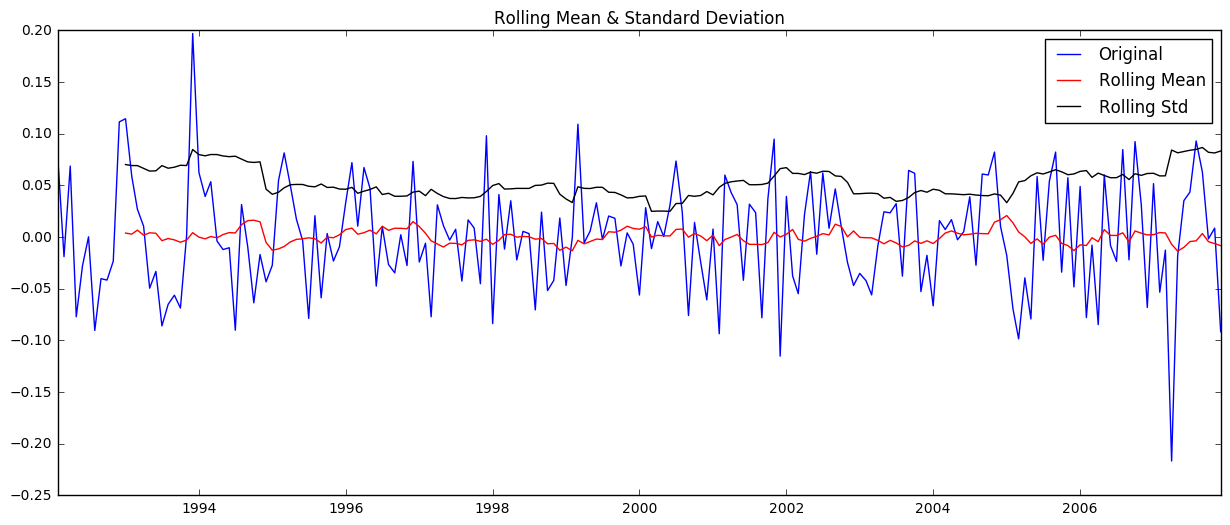

Results of Dickey-Fuller Test:
Test Statistic                -6.124142e+00
p-value                        8.711042e-08
#Lags Used                     1.100000e+01
Number of Observations Used    1.790000e+02
Critical Value (5%)           -2.877826e+00
Critical Value (1%)           -3.467420e+00
Critical Value (10%)          -2.575452e+00
dtype: float64


In [35]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

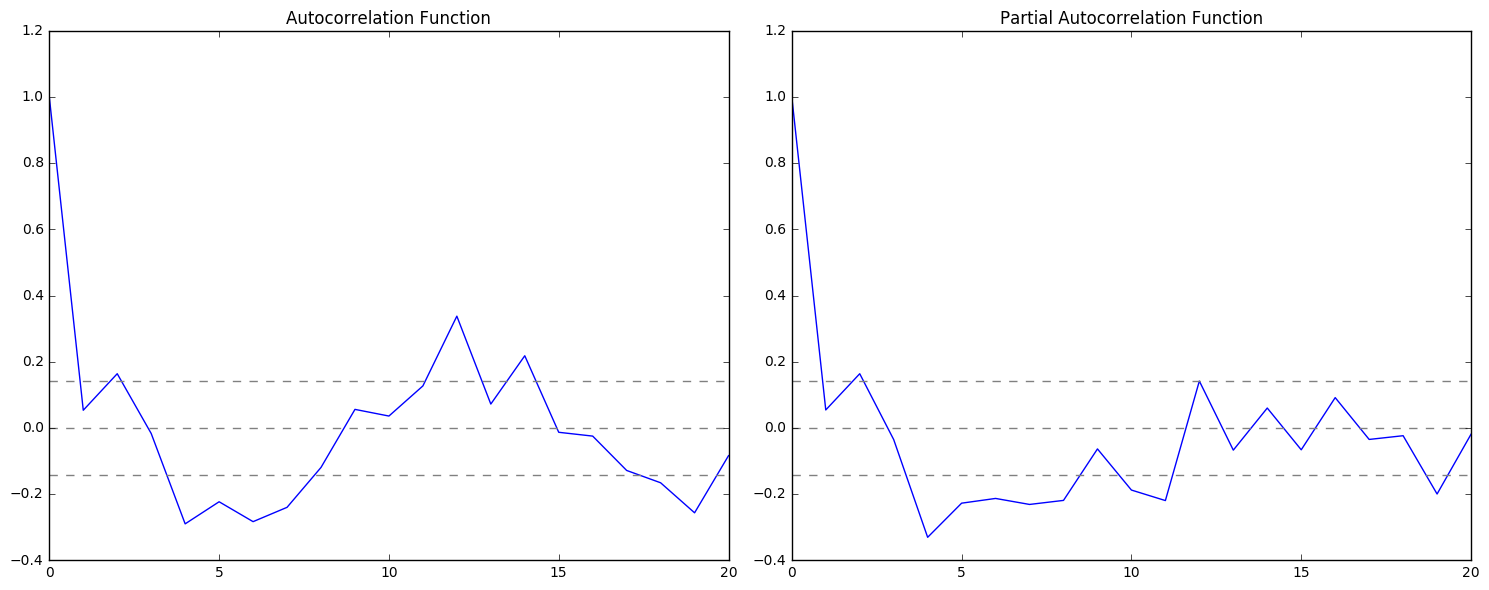

In [21]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_decompose, nlags=20)
lag_pacf = pacf(ts_log_decompose, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_decompose)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_decompose)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_decompose)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_decompose)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [19]:
from statsmodels.tsa.arima_model import ARIMA


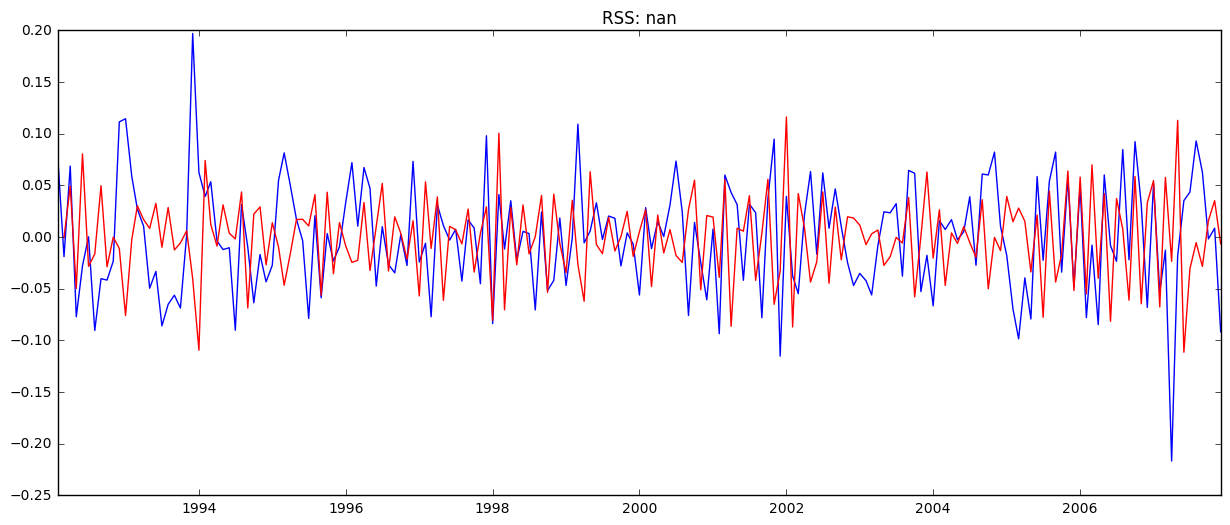

In [59]:
model = ARIMA(ts_log_decompose, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_decompose)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_decompose)**2))

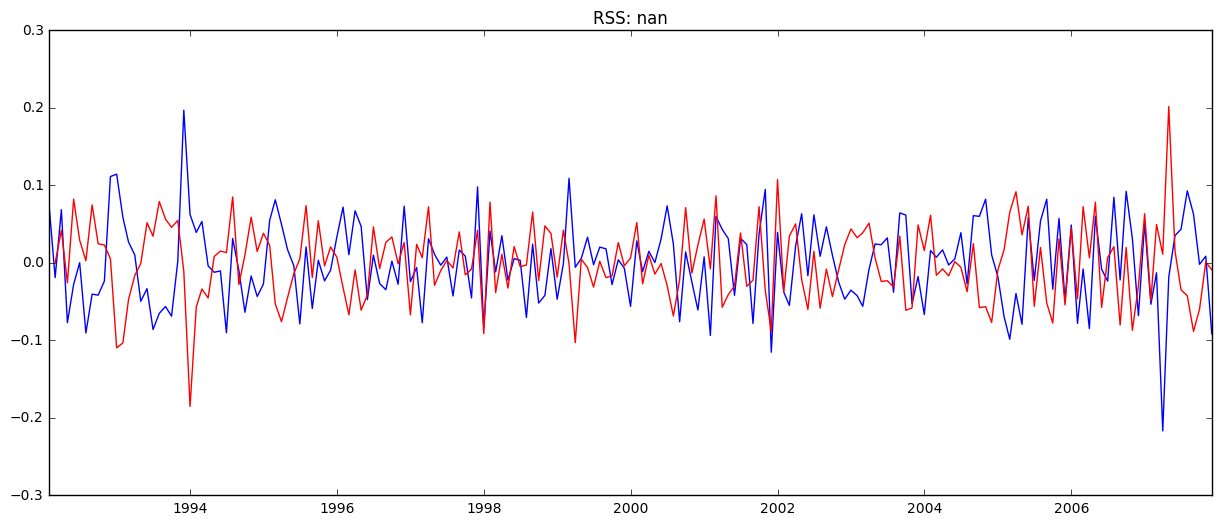

In [60]:
model = ARIMA(ts_log_decompose, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_decompose)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_decompose)**2))

In [61]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Month
1992-03-01   -0.000012
1992-04-01    0.042162
1992-05-01   -0.025652
1992-06-01    0.082220
1992-07-01    0.029415
dtype: float64


In [62]:
predictions_ARIMA_diff_trend = predictions_ARIMA_diff + trend + seasonal
print predictions_ARIMA_diff_trend.head()

Month
1991-08-01   NaN
1991-09-01   NaN
1991-10-01   NaN
1991-11-01   NaN
1991-12-01   NaN
dtype: float64


In [63]:
predictions_ARIMA_log = pd.Series(residual.ix[0], index=residual.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_trend,fill_value=0)
predictions_ARIMA_log.head()

Month
1991-08-01   NaN
1991-09-01   NaN
1991-10-01   NaN
1991-11-01   NaN
1991-12-01   NaN
dtype: float64

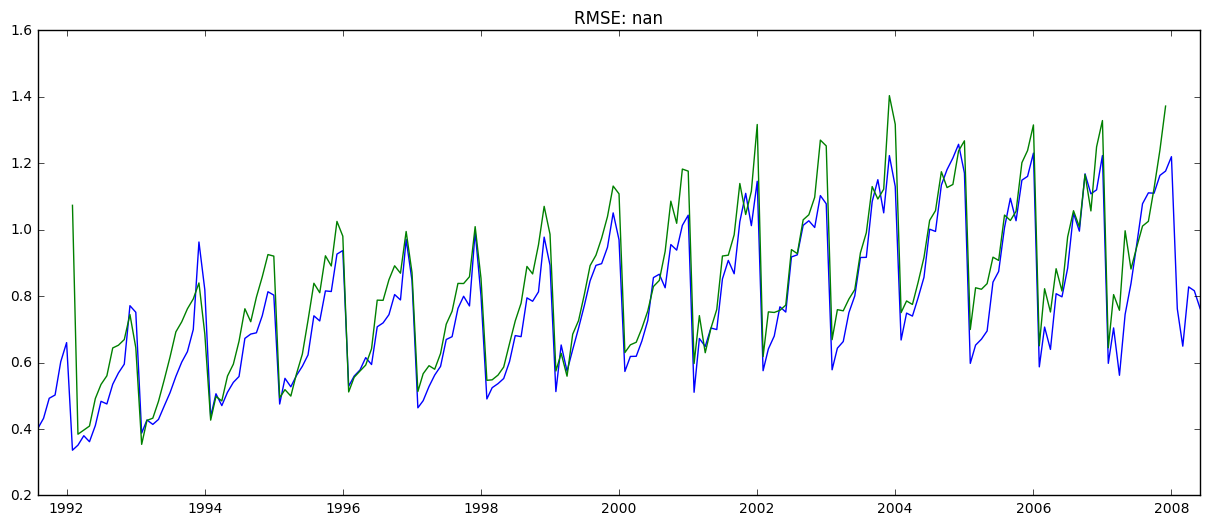

In [64]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))